In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import numpy as np
import math
plt.style.use('seaborn')
path = './healthcare-dataset-stroke-data.csv'

## Read data function
def read_data(path):
    df = pd.read_csv(path)
    df = df.dropna(axis = 0)
    return df

In [2]:
df = read_data(path)
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [4]:
def plot_categorical(df,features):
    n_plots = len(features)
    fig,axs = plt.subplots(n_plots, 1,figsize = (n_plots * 3, n_plots * 4))
    for i,ax in enumerate(axs.flatten()):
        newdf = df[features[i]]
        ax.hist(newdf)
        ax.set_title(f'Distribution of {features[i]}', size = 20)
        sns.set_style("white")
        ax.tick_params(axis='both', labelsize=15)## increase font size of both axis labels.
    fig.tight_layout() ## increases spacing between multiple plots

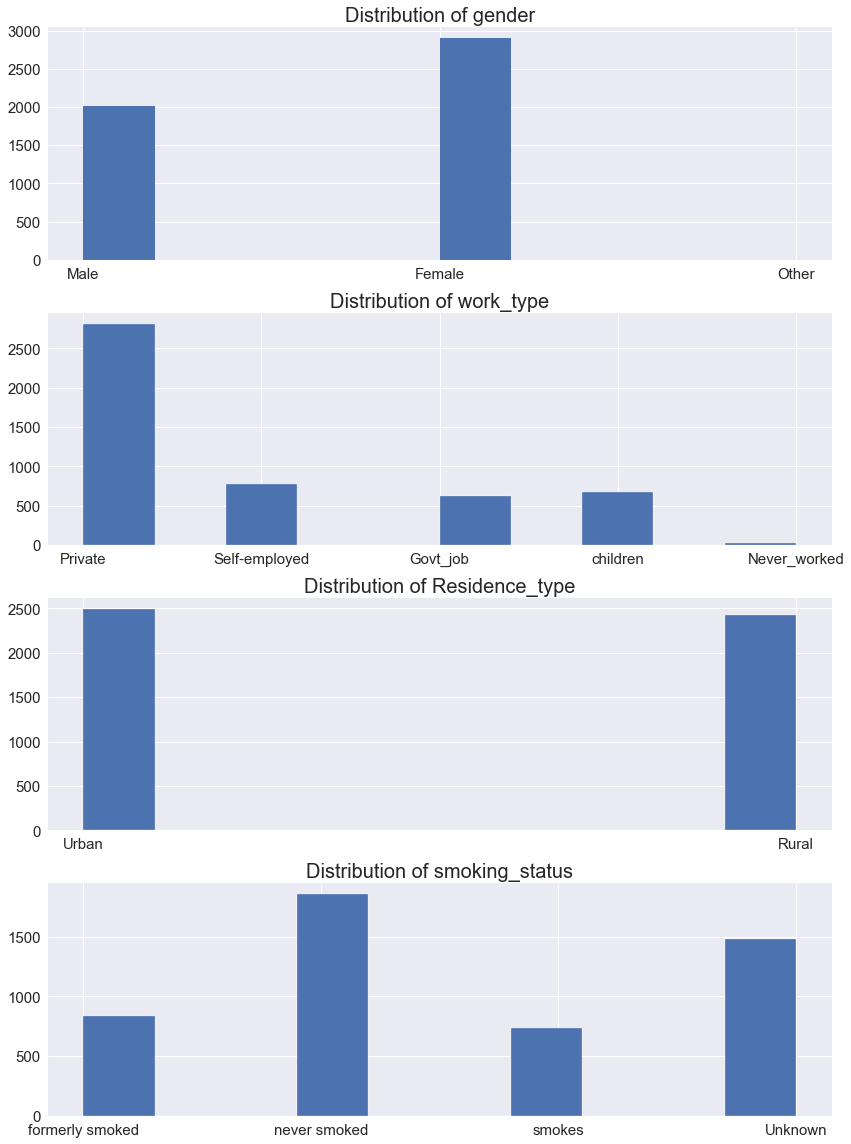

In [5]:
features= ['gender','work_type','Residence_type','smoking_status']
plot_categorical(df,features)

In [6]:

def plot_numerical(df,num_features):
    n_plots = len(num_features)
    fig,axs = plt.subplots(n_plots, 1, figsize = (n_plots *4, n_plots * 5))
    for i,val in enumerate(axs.flatten()):
        newdf = df[features[i]]
        sns.set(font_scale = 2.4)
        sns.set_style("ticks")
        sns.histplot(newdf,ax = axs[i],kde = True, alpha = 0.4, color="teal")
        axs[i].axvline(newdf.median(), color='r', linestyle='--', label="Mean")
    fig.tight_layout()

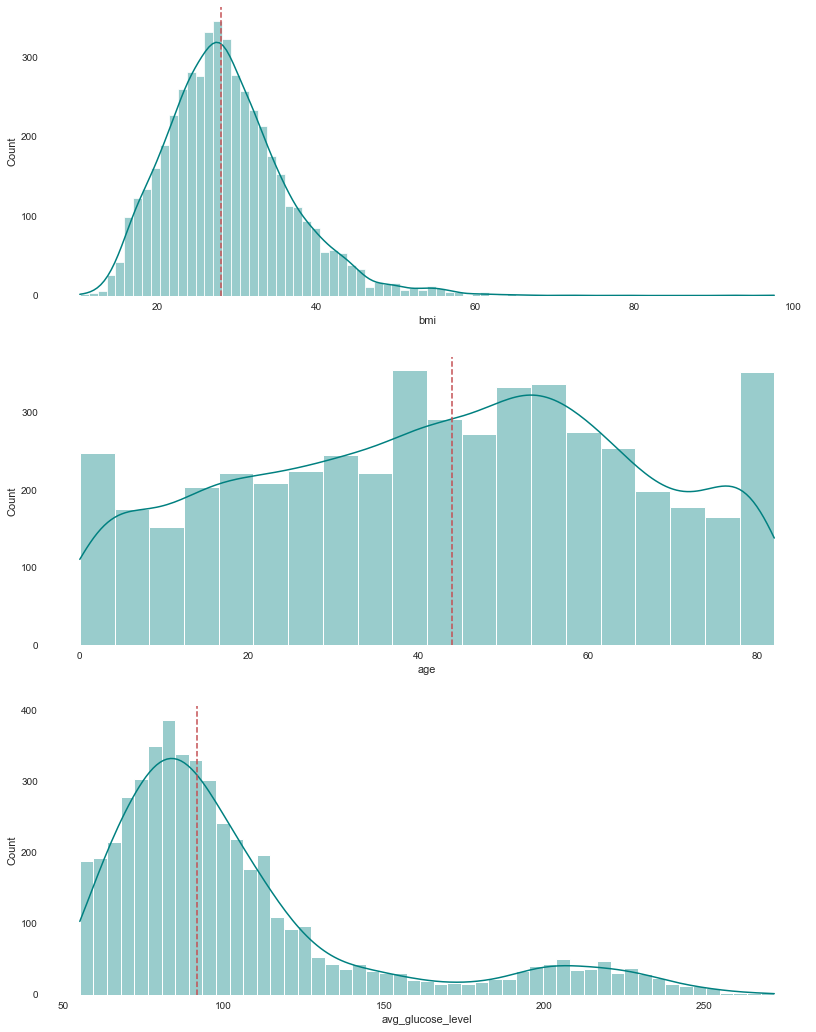

In [7]:
features = ['bmi','age','avg_glucose_level']
plot_numerical(df,features)

In [8]:
df.count()

id                   4909
gender               4909
age                  4909
hypertension         4909
heart_disease        4909
ever_married         4909
work_type            4909
Residence_type       4909
avg_glucose_level    4909
bmi                  4909
smoking_status       4909
stroke               4909
dtype: int64

In [9]:
def plot_binary(df,bin_features):
    n_plots = len(features)
    fig,axs = plt.subplots(n_plots, 1, figsize = (n_plots * 3, n_plots * 5))
    for i,val in enumerate(axs.flatten()):
        newdf = df[features[i]]
        sns.set(font_scale = 2.4)
        sns.set_style("ticks")
        sns.countplot(newdf,ax = axs[i] )
    fig.tight_layout()

/anaconda3/envs/DSI/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='stroke', ylabel='count'>

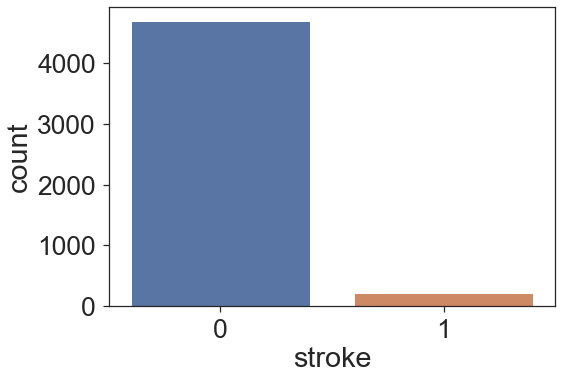

In [10]:
sns.countplot(df['stroke'],data = df)

/anaconda3/envs/DSI/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/anaconda3/envs/DSI/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/anaconda3/envs/DSI/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


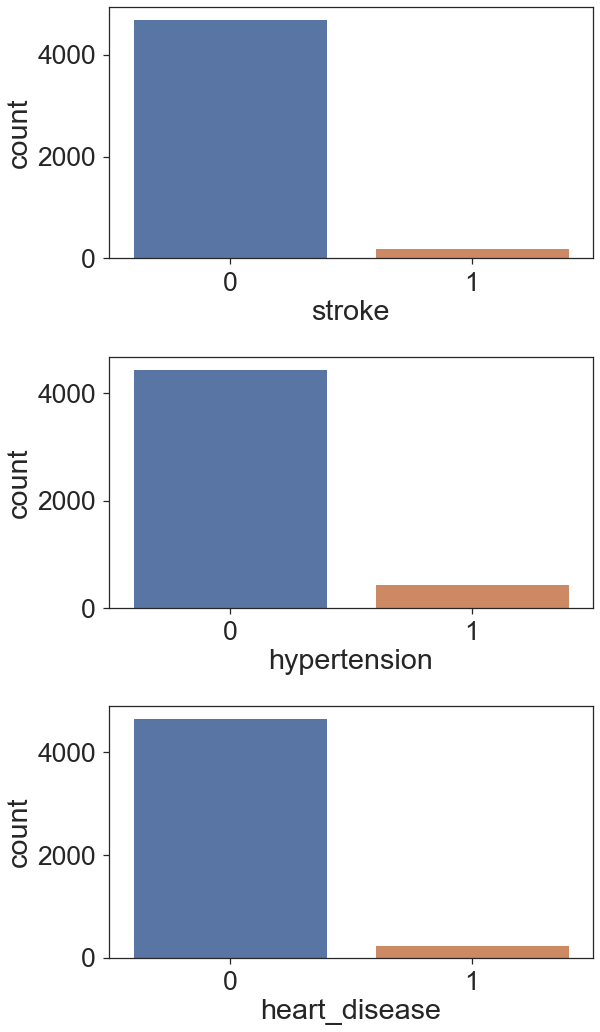

In [11]:
features = ['stroke','hypertension','heart_disease']
plot_binary(df,features)

$$ \frac{\sum x} {p} $$

## Is having higher BMI associated with stroke?

In [12]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [13]:
df_nonstroke = df[df['stroke']==0]
df_stroke = df[df['stroke']==1]

In [14]:
stats.ttest_ind(df_stroke['bmi'],df_nonstroke['bmi'])

Ttest_indResult(statistic=2.9709426097788083, pvalue=0.0029832690997420824)

In [15]:
df_stroke['bmi']

0      36.6
2      32.5
3      34.4
4      24.0
5      29.0
       ... 
243    40.5
244    36.7
245    30.9
246    29.3
248    19.6
Name: bmi, Length: 209, dtype: float64

In [16]:
stats.ttest_ind(df_stroke['avg_glucose_level'],df_nonstroke['avg_glucose_level'])

Ttest_indResult(statistic=9.827770450292483, pvalue=1.3799691107259876e-22)

#!pip install statannot
degree of freedom

amount of independent information.
similar to sample size.

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

1 v.s. 0: t-test independent samples with Bonferroni correction, P_val=2.983e-03 stat=2.971e+00


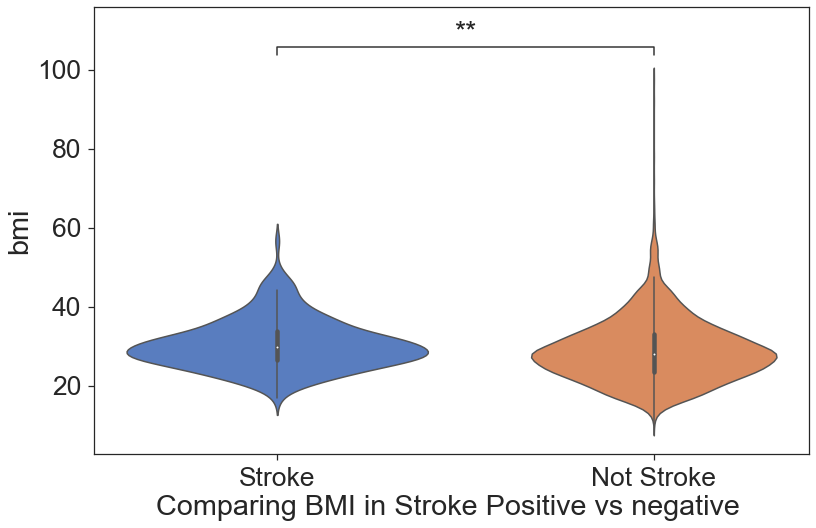

In [19]:
from statannot import add_stat_annotation
fig,ax = plt.subplots(figsize = (12,8))
## convert to category
df["stroke_"]= df["stroke"].astype(str)
sns.set_context("talk")
sns.set(font_scale = 2.4)
sns.set_style("ticks")
sns.violinplot(x =  "stroke_", y = "bmi", data = df, palette = 'muted')
#sns.stripplot(x =  "stroke", y = "bmi", data = df,color = "black",edgecolor =  'gray')
ax.set_xticklabels(labels = ['Stroke', 'Not Stroke'])
ax.set_xlabel("Comparing BMI in Stroke Positive vs negative ")
# Then with the str order
#order = [str(window_id) for window_id in order]
add_stat_annotation(
    ax,
    data=df,
    x= "stroke_",
    y="bmi",
    #order = order,
   box_pairs=[
        (('0', '1')),
    ],
    test="t-test_ind",
    text_format="star",
    loc='inside'
)
fig.tight_layout()
plt.savefig("output.png")
#ax.set_legend('Stroke','Not Stroke')

In [ ]:
we are doing sampling distribution tests, use CLT to show differences in BMI, do bootstrapping.
to get the visuals.

add violin plots and show dist plots on side

In [20]:
type(df['stroke'].unique())

numpy.ndarray

## Is BMI, Age and Average Glucose Level associated with stroke?

In [21]:
features = ['bmi','age','avg_glucose_level']


In [22]:
def plot_strokeboxplots(df,num_features):
    from statannot import add_stat_annotation
    n_plots = len(num_features)
    df["stroke_"]= df["stroke"].astype(str)
    fig,axs = plt.subplots(n_plots, 1, figsize = (n_plots *4, n_plots * 6))
    for i,val in enumerate(axs.flatten()):
    ## convert to category
        sns.set_context("talk")
        sns.set(font_scale = 2.4)
        sns.set_style("ticks")
        sns.violinplot(x =  "stroke_", y = num_features[i], data = df, palette = 'muted',ax = axs[i])
        #sns.stripplot(x =  "stroke", y = "bmi", data = df,color = "black",edgecolor =  'gray')
        ax.set_xticklabels(labels = ['Stroke', 'Not Stroke'])
        ax.set_xlabel("Comparing in Stroke Positive vs negative ")
        # Then with the str order
        #order = [str(window_id) for window_id in order]
        add_stat_annotation(
            ax = axs[i],
            data=df,
            x= "stroke_",
            y=num_features[i],
            #order = order,
           box_pairs=[
                (('0', '1')),
            ],
            test="t-test_ind",
            text_format="star",
            loc='inside'
        )
    fig.tight_layout()
#ax.set_legend('Stroke','Not Stroke')

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

1 v.s. 0: t-test independent samples with Bonferroni correction, P_val=2.983e-03 stat=2.971e+00
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

1 v.s. 0: t-test independent samples with Bonferroni correction, P_val=3.656e-61 stat=1.673e+01
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

1 v.s. 0: t-test independent samples with Bonferroni correction, P_val=1.380e-22 stat=9.828e+00


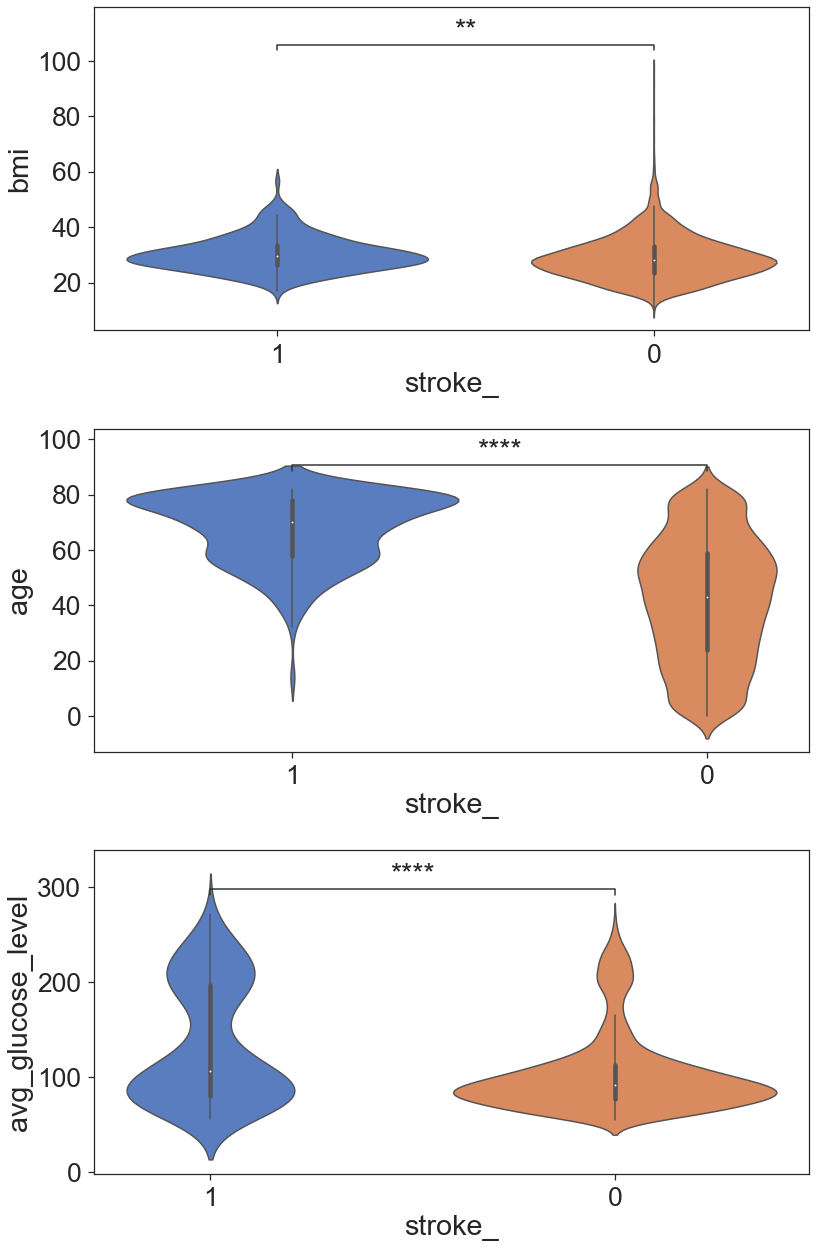

In [24]:
plot_strokeboxplots(df,features)

### Is BMI, Age and Average Glucose Level associated with heart disease?

In [25]:
def plot_heartboxplots(df,num_features):
    from statannot import add_stat_annotation
    n_plots = len(num_features)
    df["heart_disease_"]= df["heart_disease"].astype(str)
    fig,axs = plt.subplots(n_plots, 1, figsize = (n_plots *4, n_plots * 6))
    for i,val in enumerate(axs.flatten()):
    ## convert to category
        sns.set_context("talk")
        sns.set(font_scale = 2.4)
        sns.set_style("ticks")
        sns.violinplot(x =  "heart_disease_", y = num_features[i], data = df, palette = 'muted',ax = axs[i])
        #sns.stripplot(x =  "stroke", y = "bmi", data = df,color = "black",edgecolor =  'gray')
        #ax.set_xticklabels(labels = ['Stroke', 'Not Stroke'])
        ax.set_xlabel("Comparing in Heart Disease vs No Heart Disease")
        # Then with the str order
        #order = [str(window_id) for window_id in order]
        add_stat_annotation(
            ax = axs[i],
            data=df,
            x= "heart_disease_",
            y=num_features[i],
            #order = order,
           box_pairs=[
                (('0', '1')),
            ],
            test="t-test_ind",
            text_format="star",
            loc='inside'
        )
    fig.tight_layout()
#ax.set_legend('Stroke','Not Stroke')

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

1 v.s. 0: t-test independent samples with Bonferroni correction, P_val=3.753e-03 stat=2.900e+00
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

1 v.s. 0: t-test independent samples with Bonferroni correction, P_val=5.798e-75 stat=1.864e+01
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

1 v.s. 0: t-test independent samples with Bonferroni correction, P_val=1.295e-27 stat=1.096e+01


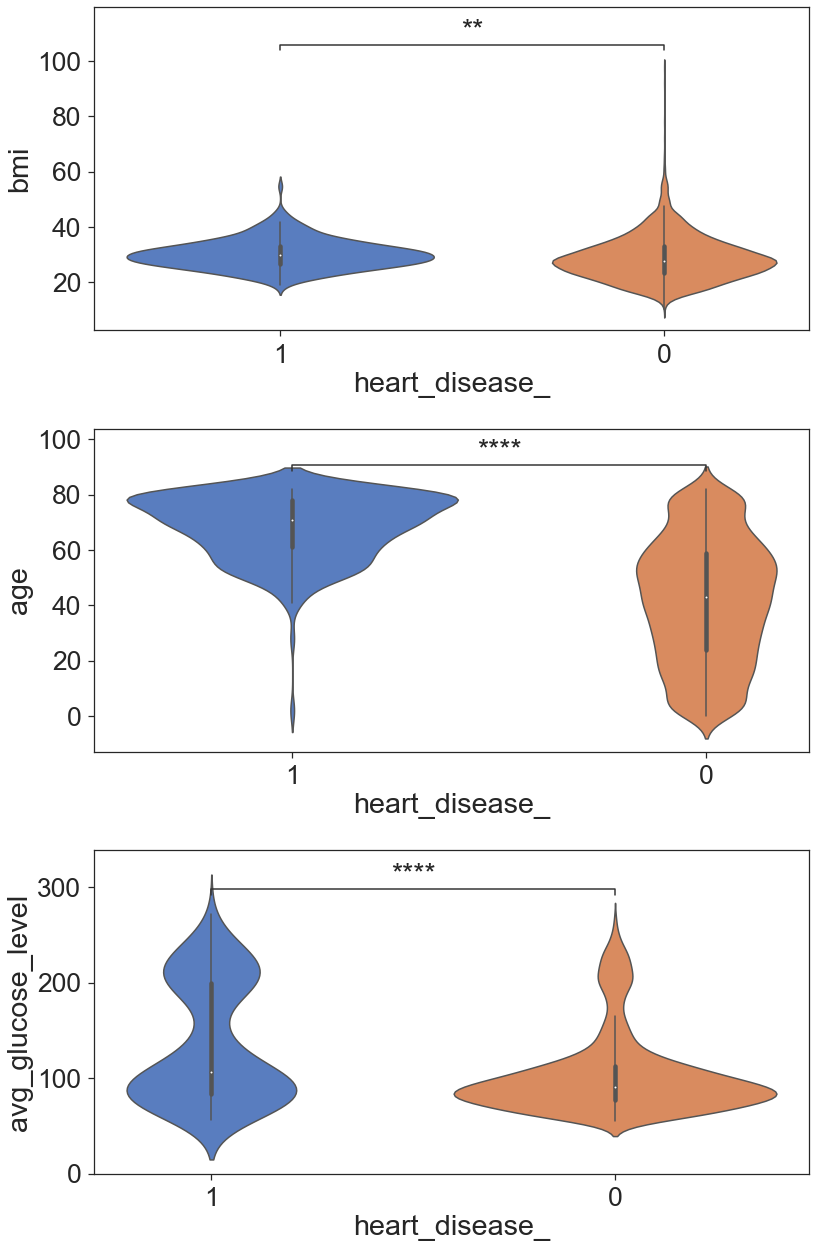

In [26]:
plot_heartboxplots(df,features)

In [28]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,stroke_,heart_disease_
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,1,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,1,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,1,0
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,1,0
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1,1,0


### Are Age,BMI and avg glucose levels correlated?

In [29]:
df[["age","bmi",'avg_glucose_level']]

,age,bmi,avg_glucose_level
0,67.0,36.6,228.69
2,80.0,32.5,105.92
3,49.0,34.4,171.23
4,79.0,24.0,174.12
5,81.0,29.0,186.21
...,...,...,...
5104,13.0,18.6,103.08
5106,81.0,40.0,125.20
5107,35.0,30.6,82.99
5108,51.0,25.6,166.29


In [30]:
features = ['bmi','age','avg_glucose_level']
def df_corr(df,features):
    newdf = df[features].corr(method ='spearman')
    return newdf

In [31]:
df2 = df_corr(df,features)
df2

,bmi,age,avg_glucose_level
bmi,1.00000,0.375650,0.114370
age,0.37565,1.000000,0.140809
avg_glucose_level,0.11437,0.140809,1.000000


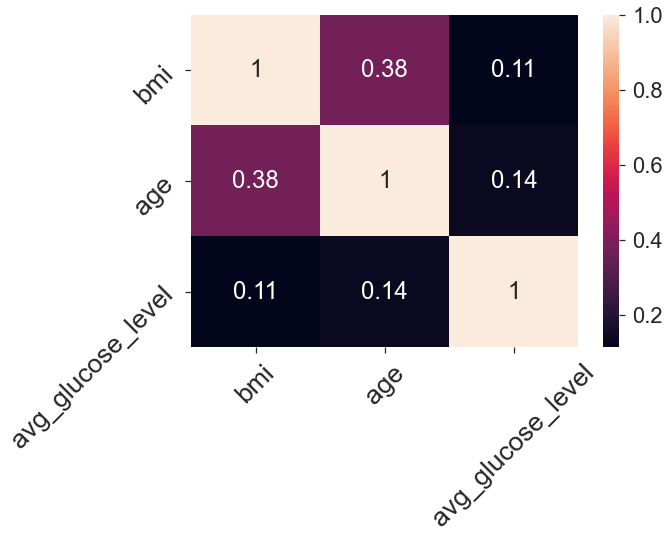

In [32]:
fig,ax = plt.subplots(1, 1, figsize = (10,8))
sns.set(font_scale = 2)
sns.heatmap(df2,annot=True)
ax.tick_params(labelrotation = 45)
fig.tight_layout()

In [33]:
stats.spearmanr(df['avg_glucose_level'],df['bmi'])[1]

9.160411716327302e-16

In [34]:
stats.spearmanr(df['age'],df['bmi'])[1]

2.475965580704734e-164

In [35]:
def get_pvals(df,features):
    pvals = np.zeros((3,3))
    for i,val in enumerate(features):
        for j,val2 in enumerate(features):
        ## store p value present in index 1
            pvals[i][j]= stats.spearmanr(df[val],df[val2])[1]
    pvals = pd.DataFrame(pvals)
    pvals.columns = features
    pvals.index = features
    return pvals
    

In [36]:
df_pval = get_pvals(df,features)
df_pval

,bmi,age,avg_glucose_level
bmi,0.000000e+00,2.475966e-164,9.160412e-16
age,2.475966e-164,0.000000e+00,3.670016e-23
avg_glucose_level,9.160412e-16,3.670016e-23,0.000000e+00


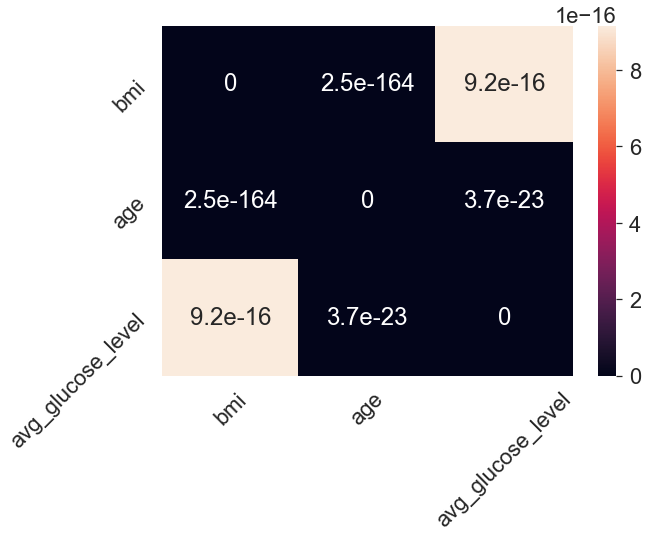

In [37]:
fig,ax = plt.subplots(1, 1, figsize = (10,8))
sns.set(font_scale = 2)
sns.heatmap(df_pval,annot=True)
ax.tick_params(labelrotation = 45)
fig.tight_layout()

In [337]:
df_heartdisease = df[df['heart_disease']==1]
df_heartdisease.count()

id                   243
gender               243
age                  243
hypertension         243
heart_disease        243
ever_married         243
work_type            243
Residence_type       243
avg_glucose_level    243
bmi                  243
smoking_status       243
stroke               243
stroke_              243
heart_disease_       243
dtype: int64

In [338]:
df_noheartdisease = df[df['heart_disease']==0]
df_noheartdisease.count()

id                   4666
gender               4666
age                  4666
hypertension         4666
heart_disease        4666
ever_married         4666
work_type            4666
Residence_type       4666
avg_glucose_level    4666
bmi                  4666
smoking_status       4666
stroke               4666
stroke_              4666
heart_disease_       4666
dtype: int64

### Doing ANOVA comparison between multiple groups

#### ANOVA test used to compare the means of more than 2 groups (t-test can be used to compare 2 groups)

        Null hypothesis: Groups means are equal (no variation in means of groups)
        H0: μ1=μ2==μ
        Alternative hypothesis: At least, one group mean is different from other groups
        H1: All μ are not equal

## Smoking status

### Does BMI vary with smoking status?

In [40]:
groups = df['smoking_status'].unique()
# df_nonstroke = df[df['stroke']==0]
# df_stroke = df[df['stroke']==1]
# df.columns
bmi_grouped = []
for i,val in enumerate(groups):
    ## filter the data frame with a smoking status and then select only the bmi column
    bmi_grouped.append(df[df['smoking_status']==val]['bmi'])
    

In [304]:
groups = df['smoking_status'].unique()
groups

array(['formerly smoked', 'never smoked', 'smokes', 'Unknown'],
      dtype=object)

In [41]:
stats.f_oneway(bmi_grouped[0],bmi_grouped[1],bmi_grouped[2],bmi_grouped[3])

F_onewayResult(statistic=131.4144898802337, pvalue=6.947846888855373e-82)

In [42]:
stats.kruskal(bmi_grouped[0],bmi_grouped[1],bmi_grouped[2],bmi_grouped[3])

KruskalResult(statistic=449.148906996158, pvalue=4.984860662864031e-97)

### Does BMI vary with working status?

In [43]:
#work_type
groups = df['work_type'].unique()
# df_nonstroke = df[df['stroke']==0]
# df_stroke = df[df['stroke']==1]
# df.columns
bmi_workgrouped = []
for i,val in enumerate(groups):
    ## filter the data frame with a smoking status and then select only the bmi column
    bmi_workgrouped.append(df[df['work_type']==val]['bmi'])
    

In [44]:
df['work_type'].unique()

array(['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked'],
      dtype=object)

In [45]:
stats.f_oneway(bmi_workgrouped[0],bmi_workgrouped[1],bmi_workgrouped[2],bmi_workgrouped[3],bmi_workgrouped[4])

F_onewayResult(statistic=312.40941297017946, pvalue=9.469086811642953e-240)

In [46]:
stats.kruskal(bmi_workgrouped[0],bmi_workgrouped[1],bmi_workgrouped[2],bmi_workgrouped[3],bmi_workgrouped[4])

KruskalResult(statistic=1180.0622675939514, pvalue=3.3446047306893744e-254)

#### Yes BMI varies with smoking status

In [47]:
# a = np.array([0, 0, 0, 1, 1, 1, 1])
# b = np.arange(7)
# stats.pointbiserialr(a, b)
#(0.8660254037844386, 0.011724811003954652)

## What is Point-Biserial Correlation?

### categorical vs continuous correlation

Like all correlation analyses the Point-Biserial Correlation measures the strength of association or co-occurrence between two variables. (categorical vs continuous)
e.g.  indicates a positive relationship between the math score and passing the final exam or failing it. 

Stroke and age are correlated

In [486]:
stats.pointbiserialr(df['stroke'], df['age'])

PointbiserialrResult(correlation=0.23233085553484956, pvalue=3.655693322006298e-61)

## Chi squared test
## Testing association between categorical variables

#### Does having heart disease associate with stroke?

### Heart disease and stroke

In [49]:
# Contingency table.
contingency = pd.crosstab(df['stroke'], df['heart_disease'])
contingency

heart_disease,0,1
stroke,,
0,4497,203
1,169,40


In [305]:
# Chi-square test of independence.
chi, p, dof, expected = stats.chi2_contingency(contingency)
chi, p, dof, expected

(97.2749949311716,
 6.033751208728256e-23,
 1,
 array([[4268.20126299,  189.79873701],
        [ 431.79873701,   19.20126299]]))

Since the p-value is significant, there is association between heart disease and stroke

#### Does having hypertension associate with heart disease?

### Hyper tension and heart disease

In [51]:
# Contingency table.
contingency = pd.crosstab(df['hypertension'], df['heart_disease'])
contingency

heart_disease,0,1
hypertension,,
0,4273,185
1,393,58


In [52]:
# Chi-square test of independence.
chi, p, dof, expected = stats.chi2_contingency(contingency)
chi, p, dof, expected

(64.20691924994273,
 1.1201467063831507e-15,
 1,
 array([[4237.32491342,  220.67508658],
        [ 428.67508658,   22.32491342]]))

Since the p-value is significant, there is association between hypertension and heart disease

#### Does having hypertension associate with stroke?

### Hypertension and stroke

In [53]:
# Contingency table.
contingency = pd.crosstab(df['hypertension'], df['stroke'])
contingency

stroke,0,1
hypertension,,
0,4309,149
1,391,60


In [54]:
# Chi-square test of independence.
chi, p, dof, expected = stats.chi2_contingency(contingency)
chi, p, dof, expected

(97.2749949311716,
 6.033751208728256e-23,
 1,
 array([[4268.20126299,  189.79873701],
        [ 431.79873701,   19.20126299]]))

Since the p-value is significant, there is association between hypertension and stroke

In [55]:
observed_vals = contingency.reset_index(drop=True)
observed_vals = observed_vals.rename_axis(None, axis=1)
observed_vals.set_index([["hypertension_0", "hypertension_1"]], inplace=True)
observed_vals = observed_vals.reset_index()
observed_vals.rename(columns={"index": "hypertension",0: "stroke_0", 1:"stroke_1"}, inplace=True)
observed_vals

,hypertension,stroke_0,stroke_1
0,hypertension_0,4309,149
1,hypertension_1,391,60


In [56]:
expected_vals = pd.DataFrame(expected)
expected_vals.set_index([["hypertension_0", "hypertension_1"]], inplace=True)
expected_vals = expected_vals.reset_index()
expected_vals.rename(columns={"index": "hypertension", 0: "stroke_0", 1:"stroke_1"}, inplace=True)
expected_vals

,hypertension,stroke_0,stroke_1
0,hypertension_0,4268.201263,189.798737
1,hypertension_1,431.798737,19.201263


In [57]:
# Creating a column-wise sum table, adding back the column with hypertension names
col_sum = pd.DataFrame(observed_vals.sum(axis=1), columns=["count"])
col_sum.insert(0, "hypertension", ["hypertension_0", "hypertension_1"], True)
# Creating a row-wise sum table
row_sum = pd.DataFrame(observed_vals.iloc[:,1:].sum(axis=0), columns=["count"])
#row_sum.rename(columns={"index":"stroke"}, inplace=True)
row_sum.insert(0, "stroke", ["stroke_0", "stroke_1"], True)


In [58]:
col_sum

,hypertension,count
0,hypertension_0,4458
1,hypertension_1,451


In [59]:
row_sum

,stroke,count
stroke_0,stroke_0,4700
stroke_1,stroke_1,209


In [353]:
# Find all the unique hypertension for pairwise comparison
hypertensions = ['hypertension_0','hypertension_1']
# Find all the unique stroke for pairwise comparison
strokes = ['stroke_0','stroke_1']
# Iterate through all combinations of parties and status
for p in hypertensions:
    for s in strokes:
        observed = float(observed_vals.loc[observed_vals.hypertension == p][s].values[0])
        expected = float(expected_vals.loc[expected_vals.hypertension == p][s].values[0])
        col_total = float(col_sum[col_sum["hypertension"] == p]["count"].values[0])
        row_total = float(row_sum[row_sum["stroke"] == s]["count"].values[0])
        print("observed:" ,observed,"expected:",expected, "coltotal:",col_total,"rowtotal:",row_total)
        expected_row_prop = expected/row_total
        expected_col_prop = expected/col_total
        print("exp",expected_row_prop,expected_col_prop)
        std_resid = (observed - expected) / (math.sqrt(expected * (1-expected_row_prop) * (1-expected_col_prop)))
        print("std_resid",std_resid)
        p_val = stats.norm.sf(abs(std_resid))
        if p_val < 0.05/4:
            print(p, s, std_resid, p_val)

observed: 4309.0 expected: 4268.201262986352 coltotal: 4458.0 rowtotal: 4700.0
exp 0.9081279282949685 0.9574251375025464
std_resid 9.985179861891359
hypertension_0 stroke_0 9.985179861891359 8.848990968882119e-24
observed: 149.0 expected: 189.7987370136484 coltotal: 4458.0 rowtotal: 209.0
exp 0.9081279282949685 0.04257486249745366
std_resid -9.985179861891462
hypertension_0 stroke_1 -9.985179861891462 8.848990968872909e-24
observed: 391.0 expected: 431.7987370136484 coltotal: 451.0 rowtotal: 4700.0
exp 0.09187207170503157 0.9574251375025463
std_resid -9.985179861891455
hypertension_1 stroke_0 -9.985179861891455 8.848990968873484e-24
observed: 60.0 expected: 19.201262986351598 coltotal: 451.0 rowtotal: 209.0
exp 0.09187207170503156 0.04257486249745365
std_resid 9.98517986189146
hypertension_1 stroke_1 9.98517986189146 8.84899096887304e-24


In [349]:
observed = float(observed_vals.loc[observed_vals.hypertension == 'hypertension_0']['stroke_0'].values[0])
observed

4309.0

In [350]:
expected = float(expected_vals.loc[expected_vals.hypertension == 'hypertension_0']['stroke_0'].values[0])
expected

4268.201262986352

In [351]:
col_total = float(col_sum[col_sum["hypertension"] == 'hypertension_0']["count"].values[0])
col_total

4458.0

In [354]:
4309.0 - 4268

41.0

In [356]:
(math.sqrt(4268.2 * (1-0.9081279282949685) * (1- 0.9574251375025464)))

4.085928500202705

Turns out all aare significant

### send the code to Heather

## Central Limit theorem : Heartdisease vs No heart disease : Stroke(predictor)

In [344]:
np.sum(df_heartdisease['stroke'])/len(df_heartdisease)


0.1646090534979424

In [345]:
np.sum(df_noheartdisease['stroke'])/len(df_noheartdisease)

0.03621945992284612

We can fit a normal distribution and check the p-value


In [309]:
## Null hypothesis  : Mean of having stroke if you have heart disease is same(0.033)
## Alternate hypothesis  : Mean of having stroke if you have heart disease is different.


sd = np.sqrt(.03342* (1 - .03342))/np.sqrt(len(df_noheartdisease))
alpha = 0.05 ## rejection threshold                                   
null = stats.norm(0.03342,sd)
                 

In [175]:
## p-value 
1 - null.cdf(0.133)

0.0

In [177]:
## Null hypothesis  : Mean of having stroke if you dont have heart disease is same(= 0.133)
## Alternate hypothesis  : Mean of having stroke if you dont have heart disease is different.

sd = np.sqrt(.133* (1 - 0.133))/np.sqrt(len(df_heartdisease))
alpha = 0.05 ## rejection threshold                                   
null = stats.norm(0.133,sd)
                                    

In [179]:
null.cdf(.03342)

2.367237622973316e-10

In [394]:
df_heartdisease = df[(df['heart_disease']==1)& (df['hypertension']==0)].sample(n = 1000,replace = True)
df_hypertension = df[(df['hypertension']==1) & (df['heart_disease']==0)].sample(n = 1000,replace = True)
len(df_heartdisease),len(df_hypertension)

(1000, 1000)

In [393]:
np.mean(df_heartdisease['stroke'])

0.167

In [395]:
np.mean(df_hypertension['stroke'])

0.127

In [375]:
df_noheartdisease

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,stroke_,heart_disease_
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,1,0
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,1,0
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1,1,0
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1,1,0
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5104,14180,Female,13.0,0,0,No,children,Rural,103.08,18.6,Unknown,0,0,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0,0,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0,0,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0,0,0


In [374]:
df_noheartdisease['stroke'].sample(n = 300,replace = True)

1645    0
3797    0
4877    0
2977    0
895     0
       ..
3932    0
3701    0
4045    0
4633    0
2212    0
Name: stroke, Length: 300, dtype: int64

## Bayes

Beta Binomial: The difference between the binomial and the beta is that the former models the number of successes (x), while the latter models the probability (p) of success.
In other words, the probability is a parameter in binomial; In the Beta, the probability is a random variable.


In our data, 
Rate of stroke follows beta prior.

In this we already have stroke/not stroke populations so we assume is distributed as bernoulli.
and then we find the number of counts of stroke, which can be distributed as beta distribution.

In [377]:
from matplotlib import animation,rc
from IPython.display import HTML


a = 1/2
b = 1/2

samp1  = df_heartdisease['stroke'].sample(n = 300,replace = True)
samp2 = df_noheartdisease['stroke'].sample(n = 300,replace = True)


#alpha(a) is count of stroke positive individuals (prior counts of stroke positive)
#beta(b) is count of stroke negative individuals (prior counts of stroke negative)

## creating objects for plots
fig,ax =plt.subplots(figsize = [10,6])
ax.set_xlim((0,1))
ax.set_ylim((0,20))

##plots for animation
line, = ax.plot([],[])
vline = ax.axvline(0)
title = ax.set_title('')

## support of values
## also x-axis for pdf plots
support = np.linspace(0,1,100)

## create an array full of zeros to hold pdf's for posterior distribution
pdf = np.zeros([len(samp1)+1,100])

## create array of median of zeros

medians = np.zeros(len(samp1)+1)

## initializing beta prior
beta = stats.beta(a,b)

## pdf of support
pdf[0] = beta.pdf(support)
#pdf[0]

medians[0] = beta.ppf(0.5)

for i,s in enumerate(samp1):
    if s ==1:
        a+=1
    elif s ==0:
        b+=1
        ## new posterior beta distribution 
        beta = stats.beta(a,b)
        ## fill oout next pdf with updated posterior
        pdf[i+1] = beta.pdf(support)
        medians[i+1] = beta.ppf(0.5)
## store in the final no heart disease posterior     
noheartdis_posterior = beta
        
def init():
    line.set_data([],[])
    return (line,)

def animate(i):
    line.set_data(support,pdf[i])
    vline.set_xdata(medians[i])
    
    return (line,)

anim = animation.FuncAnimation(fig,animate,init_func = init,
                              frames = len(df_heartdisease)+1, interval = 50, blit =True)
print(samp1.mean())
plt.close()


0.15


In [340]:
np.array(df_heartdisease['stroke'])

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0])

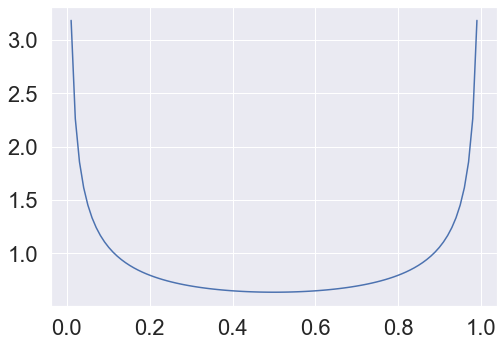

In [321]:
## Jeffrey's prior shown
support = np.linspace(0,1,100)
prior = stats.beta(1/2,1/2)
pdf = prior.pdf(support)
plt.plot(support,pdf)

In [62]:
#!pip install ffmpeg
#import ffmpeg
#conda install -y -c conda-forge ffmpeg

In [378]:
HTML(anim.to_html5_video())

In [341]:
len(df_heartdisease['stroke']),len(df_noheartdisease['stroke'])

(243, 4666)

In [379]:
from matplotlib import animation,rc
from IPython.display import HTML


a = 1/2
b = 1/2

#alpha(a) is count of stroke positive individuals (prior counts of stroke positive)
#beta(b) is count of stroke negative individuals (prior counts of stroke negative)

## creating objects for plots
fig,ax =plt.subplots(figsize = [10,6])
ax.set_xlim((0,1))
ax.set_ylim((0,20))

##plots for animation
line, = ax.plot([],[])
vline = ax.axvline(0)
title = ax.set_title('')

## support of values
## also x-axis for pdf plots
support = np.linspace(0,1,100)

## create an array full of zeros to hold pdf's for posterior distribution
pdf = np.zeros([len(samp2)+1,100])

## create array of median of zeros

medians = np.zeros(len(samp2)+1)

## initializing beta prior
beta = stats.beta(a,b)

## pdf of support
pdf[0] = beta.pdf(support)
#pdf[0]

medians[0] = beta.ppf(0.5)

for i,s in enumerate(samp2):
    if s ==1:
        a+=1
    elif s ==0:
        b+=1
        ## new posterior beta distribution 
        beta = stats.beta(a,b)
        ## fill oout next pdf with updated posterior
        pdf[i+1] = beta.pdf(support)
        medians[i+1] = beta.ppf(0.5)
## store in the final no heart disease posterior     
noheartdis_posterior = beta
        
def init():
    line.set_data([],[])
    return (line,)

def animate(i):
    line.set_data(support,pdf[i])
    vline.set_xdata(medians[i])
    
    return (line,)

anim = animation.FuncAnimation(fig,animate,init_func = init,
                              frames = len(df_noheartdisease)+1, interval = 50, blit =True)
print(samp2.mean())
plt.close()
        

0.04666666666666667


In [343]:
samples = stats.binom.rvs(1,0.4, size=200)
samples

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 0])

In [324]:
np.sum(df_heartdisease['stroke'])/len(df_heartdisease)

0.13303769401330376

In [325]:
np.sum(df_noheartdisease['stroke'])/len(df_noheartdisease)

0.03342305966801256

In [65]:
HTML(anim.to_html5_video())

## Hypothesis testing with Bayes

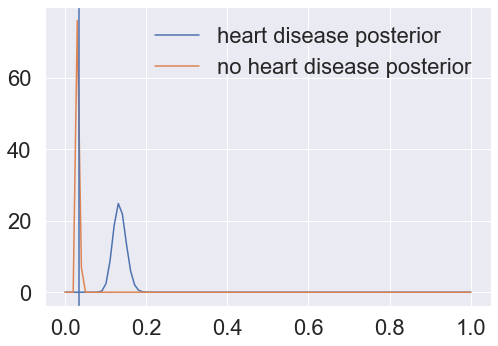

In [326]:
## Now we have a posterior distribution of both and we can say which is more likely.
## what portion of posterior pdf of heart disease is above 0.033
support = np.linspace(0,1,100)
#prior = stats.beta(1/2,1/2)
heartdis_posteriorpdf = heartdis_posterior.pdf(support)
noheartdis_posteriorpdf = noheartdis_posterior.pdf(support)

plt.plot(support,heartdis_posteriorpdf)
plt.plot(support,noheartdis_posteriorpdf)
plt.legend(['heart disease posterior','no heart disease posterior'])

## Question answered: how likely to get stroke if have heart disease
1 - heartdis_posterior.cdf(0.03342)
plt.axvline(0.03342)
## so 100% more likely to have stroke if you have heart disease?

In [327]:
len(df_heartdisease),len(df_noheartdisease)

(451, 4458)

## Comparing two distributions

In [330]:
## Now we can sample from both distributions 
## What percent of the time you will have stroke if you have heart disease vs if you do not have heart disease?
heartdis_samples = heartdis_posterior.rvs(10)
noheartdis_samples = noheartdis_posterior.rvs(10)
a_gt_b = heartdis_samples>noheartdis_samples


In [331]:
a_gt_b.mean() ### 100 percent more likely to have stroke if you have heart disease?

1.0

In [109]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,stroke_,heart_disease_
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,1,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,1,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,1,0
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,1,0
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1,1,0


## Bayes Hypothesis testing Male vs Female

Question: Are male more likely to have stroke?
Null : There is no difference.
Alternate: Male are more likely to have stroke than females.

In [125]:
df_male = df[df['gender']=='Male']
df_male.count()

id                   2011
gender               2011
age                  2011
hypertension         2011
heart_disease        2011
ever_married         2011
work_type            2011
Residence_type       2011
avg_glucose_level    2011
bmi                  2011
smoking_status       2011
stroke               2011
stroke_              2011
heart_disease_       2011
dtype: int64

In [126]:
df_female = df[df['gender']=='Female']
df_female.count()

id                   2897
gender               2897
age                  2897
hypertension         2897
heart_disease        2897
ever_married         2897
work_type            2897
Residence_type       2897
avg_glucose_level    2897
bmi                  2897
smoking_status       2897
stroke               2897
stroke_              2897
heart_disease_       2897
dtype: int64

In [127]:
np.mean(df_male['stroke']),np.mean(df_female['stroke'])

(0.044256588761810045, 0.04142216085605799)

In [129]:
np.sum(df_male['stroke']),np.sum(df_female['stroke'])

(89, 120)

In [130]:
len(df_male['stroke']),len(df_female['stroke'])

(2011, 2897)

In [134]:
post_male = stats.beta(1/2+89, 1/2 + 2011 - 89)
post_female = stats.beta(1/2+120, 1/2 + 2897 - 120)

0.7716968179346245

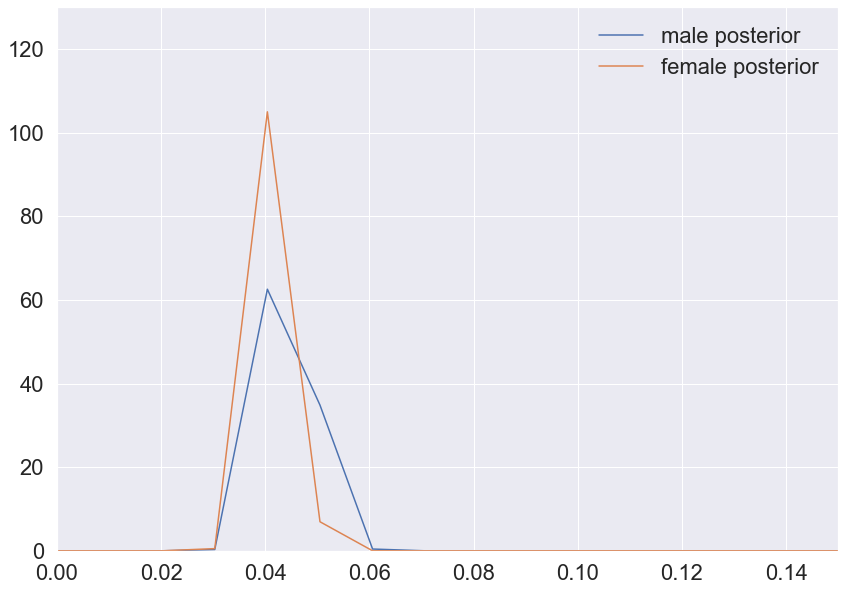

In [430]:
## Hypothesis testing with Bayes 

## Now we have a posterior distribution of both and we can say which is more likely.
## what portion of posterior pdf of heart disease is above 0.033
support = np.linspace(0,1,100)
#prior = stats.beta(1/2,1/2)
post_malepdf = post_male.pdf(support)
post_femalepdf = post_female.pdf(support)
fig,ax =plt.subplots(figsize = (14,10))
plt.plot(support,post_malepdf)
plt.plot(support,post_femalepdf)
plt.legend(['male posterior','female posterior'])
ax.set_xlim(0,0.15)
ax.set_ylim(0,130)

## Question answered: how likely to get stroke if you are male
1 - post_male.cdf(0.041)
#plt.axvline(0.041)
## so 100% more likely to have stroke if you are male?

In [303]:
post_male.cdf(0.041)

0.22830318206537548

In [425]:
### Comparing two distributions another way
## Now we can sample from both distributions 
## What percent of the time you will have stroke if you are male vs if you are female?
male_samples = post_male.rvs(1000)
female_samples = post_female.rvs(1000)
a_gt_b = male_samples>female_samples
a_gt_b.mean()

0.728

### Credible Intervals


    -Having fitted the model, we regularly want to get an interval for the true population mean. 
    -In frequentist statistics, these intervals are called "confidence intervals". 
    -Remember that in frequentist statistics the idea is that there is a true, unknown population parameter and the data is random. 
    
    -Then, the idea is to derive the confidence interval from a sample so that we can state that an interval constructed this way will contain the true parameter e.g., 95% of times.
    -Hence, with confidence intervals, we can only make probabilistic statements about the interval, not the parameter. We cannot say that the interval contains the true parameter with 95% probability.

#### In Bayes

    -In contrast, Bayesian credible intervals allow for these kind of probabilistic statements about the parameter.
    -They can be constructed very intuitively directly from the posterior by deriving e.g., the 95% highest density interval. 
    -Then, we can say that constructed interval contains the parameter with 95% probability.

In [180]:
### Credibility interval for Bayes
post_male.interval(0.95),post_female.interval(0.95)

((0.03591404560421195, 0.05390932227687728),
 (0.03461820857034231, 0.04914159010433439))

#### Interpretation
Probability that male is more likely to have stroke than a female is 68%

In [222]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,stroke_,heart_disease_
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,1,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,1,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,1,0
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,1,0
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1,1,0


In [484]:
### do all the posteriors of the variables

In [450]:
df_heartdis = df[(df['heart_disease']==1) ]
len(df_heartdis)

243

In [451]:
np.sum(df_heartdis['stroke']),np.mean(df_heartdis['stroke'])

(40, 0.1646090534979424)

In [452]:
df_bmi = df[(df['bmi']>30) ]
len(df_bmi)

1893

In [453]:
np.sum(df_bmi['stroke']),np.mean(df_bmi['stroke'])

(96, 0.05071315372424723)

In [454]:
df_hypertension = df[(df['hypertension']==1) ]
len(df_hypertension)

451

In [455]:
df_hypertension.head()
np.sum(df_hypertension['stroke']),np.mean(df_hypertension['stroke'])

(60, 0.13303769401330376)

In [461]:
df_smoking = df[(df['smoking_status']=='smokes') | (df['smoking_status']=='formerly smoked') ]
len(df_smoking),np.mean(df_smoking['stroke'])


(1574, 0.060991105463786534)

In [462]:
df_smoking.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,stroke_,heart_disease_
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,1,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,1,0
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1,1,0
11,12095,Female,61.0,0,1,Yes,Govt_job,Rural,120.46,36.8,smokes,1,1,1
12,12175,Female,54.0,0,0,Yes,Private,Urban,104.51,27.3,smokes,1,1,0


In [470]:
df_residence =  df[(df['ever_married']=='No')]
len(df_residence),np.mean(df_residence['stroke'])


(1705, 0.013489736070381233)

In [474]:
df_diabetes = df[df['avg_glucose_level']>125]
len(df_diabetes),np.mean(df_diabetes['stroke'])

(934, 0.09314775160599571)

In [292]:
 20 + 43 + 20

83

In [417]:
df_heartdisease.count()

id                   1000
gender               1000
age                  1000
hypertension         1000
heart_disease        1000
ever_married         1000
work_type            1000
Residence_type       1000
avg_glucose_level    1000
bmi                  1000
smoking_status       1000
stroke               1000
stroke_              1000
heart_disease_       1000
dtype: int64

In [294]:
pd_comb = pd.concat([df_heartdis, df_hypertension, df_smoking])
pd_comb.count()

id                   1083
gender               1083
age                  1083
hypertension         1083
heart_disease        1083
ever_married         1083
work_type            1083
Residence_type       1083
avg_glucose_level    1083
bmi                  1083
smoking_status       1083
stroke               1083
stroke_              1083
heart_disease_       1083
dtype: int64

In [295]:
pd_comb = pd_comb.drop_duplicates()
pd_comb.count()

id                   1083
gender               1083
age                  1083
hypertension         1083
heart_disease        1083
ever_married         1083
work_type            1083
Residence_type       1083
avg_glucose_level    1083
bmi                  1083
smoking_status       1083
stroke               1083
stroke_              1083
heart_disease_       1083
dtype: int64

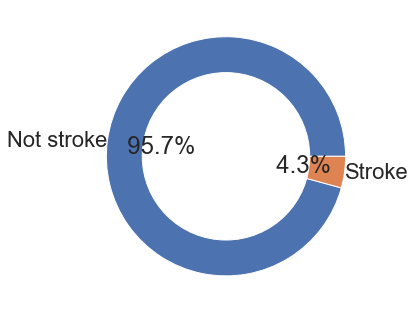

In [483]:
names='Not stroke', 'Stroke'
plt.pie(df['stroke'].value_counts(),labels = names,labeldistance=1, autopct='%1.1f%%')
# add a circle at the center to transform it in a donut chart
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)

plt.show()

References:

Bayesian inference intro
https://www.kaggle.com/philippsinger/introduction-to-bayesian-inference

Applications of AB testing
https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5626665/

Awesome resource on beta binomial
https://towardsdatascience.com/beta-distribution-intuition-examples-and-derivation-cf00f4db57af

Bayesian inference with Multinomial

https://towardsdatascience.com/estimating-probabilities-with-bayesian-modeling-in-python-7144be007815
Bayesian inference with normal

https://datapythonista.me/blog/bayesian-inference-tutorial-a-hello-world-example.html

## EDA
https://towardsdatascience.com/exploratory-data-analysis-8fc1cb20fd15

## CORRELATION
https://medium.com/@outside2SDs/an-overview-of-correlation-measures-between-categorical-and-continuous-variables-4c7f85610365

https://towardsdatascience.com/how-to-test-for-statistically-significant-relationships-between-categorical-variables-with-chi-66c3ebeda7cc


## OOP
https://www.districtdatalabs.com/computing-a-bayesian-estimate-of-star-rating-means